In [ ]:
import os
# required packages
os.system("pip install pandas scikit-learn spacy transformers vaderSentiment")

# Download spaCy model
os.system("python -m spacy download en_core_web_sm")

# Verify imports
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
import spacy
from transformers import pipeline
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

print("All libraries installed and imported successfully!")

All libraries installed and imported successfully!


In [1]:
import pandas as pd

# Set the file path to your dataset
file_path = r"C:\Users\HP\10 Acadamy PRojects\New folder (2)\Customer-Experience-Analytics\data\bank_reviews.csv"

# Load the dataset
print("Loading your bank reviews dataset...")
try:
    df = pd.read_csv(file_path)
    print(f"Success! Loaded {len(df)} reviews.")
except FileNotFoundError:
    print(f"Oops! Couldn't find 'bank_reviews.csv' at {file_path}. Please check the file path and try again.")
    exit()
except Exception as e:
    print(f"Something went wrong while loading the file: {e}")
    exit()

# Create a review_id column (since it's required but missing)
df['review_id'] = df.index + 1  # Simple ID based on row number

# Rename 'review' column to 'review_text' for consistency
df = df.rename(columns={'review': 'review_text'})

# Check for required columns
expected_columns = ['review_id', 'review_text', 'bank', 'rating']
if not all(col in df.columns for col in expected_columns):
    print(f"Error: The dataset needs these columns: {expected_columns}. Please check your data.")
    exit()

# Check for missing values
print("\nChecking for missing values in the dataset:")
print(df[expected_columns].isnull().sum())

# Drop rows with missing review_text
initial_rows = len(df)
df = df.dropna(subset=['review_text'])
if len(df) < initial_rows:
    print(f"Dropped {initial_rows - len(df)} rows with missing review text.")

# Convert review_text to lowercase
df['review_text'] = df['review_text'].astype(str).str.lower()
print("\nConverted all review text to lowercase for consistency.")

# Show a preview of the preprocessed data
print("\nHere's a peek at the first few rows:")
print(df[['review_id', 'review_text', 'bank', 'rating']].head())

# Save the preprocessed data
output_path = r"C:\Users\HP\10 Acadamy PRojects\New folder (2)\Customer-Experience-Analytics\data\preprocessed_reviews.csv"
df.to_csv(output_path, index=False)
print(f"\nAll done! Preprocessed data saved to {output_path}")

Loading your bank reviews dataset...
Success! Loaded 475 reviews.

Checking for missing values in the dataset:
review_id      0
review_text    0
bank           0
rating         0
dtype: int64

Converted all review text to lowercase for consistency.

Here's a peek at the first few rows:
   review_id          review_text                         bank  rating
0          1                dedeb  Commercial Bank of Ethiopia       5
1          2                 good  Commercial Bank of Ethiopia       5
2          3                 good  Commercial Bank of Ethiopia       5
3          4            very niec  Commercial Bank of Ethiopia       5
4          5  best app of finance  Commercial Bank of Ethiopia       5

All done! Preprocessed data saved to C:\Users\HP\10 Acadamy PRojects\New folder (2)\Customer-Experience-Analytics\data\preprocessed_reviews.csv


# sentiment Reviews

In [2]:
import pandas as pd
from transformers import pipeline

# Set file paths
input_path = r"C:\Users\HP\10 Acadamy PRojects\New folder (2)\Customer-Experience-Analytics\data\preprocessed_reviews.csv"
output_path = r"C:\Users\HP\10 Acadamy PRojects\New folder (2)\Customer-Experience-Analytics\data\reviews_with_sentiment.csv"

# Load the preprocessed dataset
print("Loading preprocessed reviews...")
try:
    df = pd.read_csv(input_path)
    print(f"Success! Loaded {len(df)} reviews.")
except FileNotFoundError:
    print(f"Oops! Couldn't find 'preprocessed_reviews.csv' at {input_path}. Please check the file.")
    exit()

# Initialize DistilBERT sentiment model
print("Loading DistilBERT model (this may take a moment)...")
try:
    distilbert = pipeline("sentiment-analysis", model="distilbert-base-uncased-finetuned-sst-2-english")
except Exception as e:
    print(f"Error loading DistilBERT model: {e}")
    exit()

# Compute sentiment for each review
def get_distilbert_sentiment(text):
    try:
        # Truncate text to 512 tokens (DistilBERT's max length)
        result = distilbert(text[:512])[0]
        label = result['label'].lower()  # 'POSITIVE' or 'NEGATIVE'
        score = result['score']
        # Convert to task's required labels (positive, negative, neutral)
        if label == 'positive' and score >= 0.6:
            return 'positive', score
        elif label == 'negative' and score >= 0.6:
            return 'negative', score
        else:
            return 'neutral', score
    except Exception as e:
        print(f"Error processing review: {e}")
        return 'neutral', 0.5  # Default for errors

print("Analyzing sentiments with DistilBERT...")
df[['sentiment_label', 'sentiment_score']] = df['review_text'].apply(get_distilbert_sentiment).apply(pd.Series)

# Show a preview of the results
print("\nHere's a peek at the reviews with sentiment:")
print(df[['review_id', 'review_text', 'bank', 'rating', 'sentiment_label', 'sentiment_score']].head())

# Save the results
df.to_csv(output_path, index=False)
print(f"\nAll done! Reviews with sentiment saved to {output_path}")

c:\Users\HP\10 Acadamy PRojects\New folder (2)\Customer-Experience-Analytics\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Loading preprocessed reviews...
Success! Loaded 475 reviews.
Loading DistilBERT model (this may take a moment)...


Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`
c:\Users\HP\10 Acadamy PRojects\New folder (2)\Customer-Experience-Analytics\.venv\Lib\site-packages\huggingface_hub\file_download.py:143: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\HP\.cache\huggingface\hub\models--distilbert-base-uncased-finetuned-sst-2-english. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as a

Analyzing sentiments with DistilBERT...

Here's a peek at the reviews with sentiment:
   review_id          review_text                         bank  rating  \
0          1                dedeb  Commercial Bank of Ethiopia       5   
1          2                 good  Commercial Bank of Ethiopia       5   
2          3                 good  Commercial Bank of Ethiopia       5   
3          4            very niec  Commercial Bank of Ethiopia       5   
4          5  best app of finance  Commercial Bank of Ethiopia       5   

  sentiment_label  sentiment_score  
0        negative         0.997484  
1        positive         0.999816  
2        positive         0.999816  
3         neutral         0.519262  
4        positive         0.999650  

All done! Reviews with sentiment saved to C:\Users\HP\10 Acadamy PRojects\New folder (2)\Customer-Experience-Analytics\data\reviews_with_sentiment.csv


# Sentiment aggregation 

In [3]:
print("\nSentiment distribution:")
print(df['sentiment_label'].value_counts())
print("\nSentiment by rating:")
print(df.groupby('rating')['sentiment_label'].value_counts())


Sentiment distribution:
sentiment_label
positive    243
negative    228
neutral       4
Name: count, dtype: int64

Sentiment by rating:
rating  sentiment_label
1       negative           122
        positive            11
2       negative            20
        neutral              1
        positive             1
3       positive            17
        negative            15
4       positive            16
        negative            11
        neutral              1
5       positive           198
        negative            60
        neutral              2
Name: count, dtype: int64


In [4]:
import pandas as pd

# Set file paths
input_path = r"C:\Users\HP\10 Acadamy PRojects\New folder (2)\Customer-Experience-Analytics\data\reviews_with_sentiment.csv"
output_agg_path = r"C:\Users\HP\10 Acadamy PRojects\New folder (2)\Customer-Experience-Analytics\data\sentiment_aggregation.csv"

# Load the dataset with sentiments
print("Loading reviews with sentiment...")
try:
    df = pd.read_csv(input_path)
    print(f"Success! Loaded {len(df)} reviews.")
except FileNotFoundError:
    print(f"Oops! Couldn't find 'reviews_with_sentiment.csv' at {input_path}. Please check the file.")
    exit()

# Aggregate sentiment scores by bank and rating
print("\nCalculating average sentiment scores by bank and rating...")
sentiment_agg = df.groupby(['bank', 'rating']).agg(
    mean_sentiment_score=('sentiment_score', 'mean'),
    review_count=('sentiment_score', 'count')
).reset_index()

# Show the aggregated results
print("\nSentiment aggregation results:")
print(sentiment_agg)

# Save the aggregated results
sentiment_agg.to_csv(output_agg_path, index=False)
print(f"\nAggregation saved to {output_agg_path}")

# Save the main DataFrame (unchanged, for consistency)
df.to_csv(input_path, index=False)
print(f"Main dataset unchanged, saved back to {input_path}")

Loading reviews with sentiment...
Success! Loaded 475 reviews.

Calculating average sentiment scores by bank and rating...

Sentiment aggregation results:
                           bank  rating  mean_sentiment_score  review_count
0             Bank of Abyssinia       1              0.983562            71
1             Bank of Abyssinia       2              0.911954             8
2             Bank of Abyssinia       3              0.955327            12
3             Bank of Abyssinia       4              0.932922             5
4             Bank of Abyssinia       5              0.966467            65
5   Commercial Bank of Ethiopia       1              0.945291            32
6   Commercial Bank of Ethiopia       2              0.998126             6
7   Commercial Bank of Ethiopia       3              0.998774             5
8   Commercial Bank of Ethiopia       4              0.957053            15
9   Commercial Bank of Ethiopia       5              0.966501           102
10       

In [6]:
print("\nOverall sentiment distribution:")
print(df['sentiment_label'].value_counts())


Overall sentiment distribution:
sentiment_label
positive    243
negative    228
neutral       4
Name: count, dtype: int64


# Keyword Extraction with TF-IDF

In [7]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

# Set file paths
input_path = r"C:\Users\HP\10 Acadamy PRojects\New folder (2)\Customer-Experience-Analytics\data\reviews_with_sentiment.csv"
output_path = r"C:\Users\HP\10 Acadamy PRojects\New folder (2)\Customer-Experience-Analytics\data\reviews_with_keywords.csv"

# Load the dataset
print("Loading reviews with sentiment...")
try:
    df = pd.read_csv(input_path)
    print(f"Success! Loaded {len(df)} reviews.")
except FileNotFoundError:
    print(f"Oops! Couldn't find 'reviews_with_sentiment.csv' at {input_path}. Please check if Step 4 completed.")
    exit()

# Initialize TF-IDF vectorizer (unigrams and bigrams)
print("\nExtracting keywords and phrases with TF-IDF...")
tfidf = TfidfVectorizer(stop_words='english', max_features=50, ngram_range=(1, 2))

# Function to get top keyword per review
def get_top_keyword(review, tfidf_matrix, feature_names):
    try:
        row = tfidf_matrix[df[df['review_text'] == review].index[0]].toarray()[0]
        top_idx = row.argmax()
        return feature_names[top_idx]
    except:
        return 'none'  # Fallback for empty/short reviews

# Extract keywords for all reviews
tfidf_matrix = tfidf.fit_transform(df['review_text'])
feature_names = tfidf.get_feature_names_out()
df['tfidf_keywords'] = df['review_text'].apply(lambda x: get_top_keyword(x, tfidf_matrix, feature_names))

# Extract bank-specific keywords
print("\nTop keywords/phrases for each bank:")
for bank in df['bank'].unique():
    bank_reviews = df[df['bank'] == bank]['review_text']
    if len(bank_reviews) > 0:
        tfidf_matrix_bank = tfidf.fit_transform(bank_reviews)
        bank_keywords = tfidf.get_feature_names_out()
        print(f"\n{bank}:")
        print(bank_keywords[:20])  # Top 20 keywords/n-grams

# Show a preview of the results
print("\nHere's a peek at the reviews with keywords:")
print(df[['review_id', 'review_text', 'bank', 'tfidf_keywords']].head())

# Save the results
df.to_csv(output_path, index=False)
print(f"\nAll done! Reviews with keywords saved to {output_path}")

Loading reviews with sentiment...
Success! Loaded 475 reviews.

Extracting keywords and phrases with TF-IDF...

Top keywords/phrases for each bank:

Commercial Bank of Ethiopia:
['access' 'add' 'amazing' 'app' 'application' 'apps' 'bad' 'bank'
 'banking' 'banking app' 'best' 'best app' 'cbe' 'developer' 'doesnt'
 'don' 'easy' 'easy use' 'fast' 'fix']

Bank of Abyssinia:
['abyssinia' 'access' 'account' 'amazing' 'app' 'app crashes'
 'application' 'apps' 'automatically' 'bank' 'banking' 'banking app'
 'best' 'better' 'boa' 'bug' 'crashes' 'developer' 'developer options'
 'doesn']

Dashen Bank:
['account' 'amole' 'android' 'apk' 'app' 'app good' 'application' 'bad'
 'bank' 'banking' 'banking app' 'best' 'dashen' 'dashen bank' 'doesn'
 'doesn work' 'don' 'easy' 'easy use' 'ethiopia']

Here's a peek at the reviews with keywords:
   review_id          review_text                         bank tfidf_keywords
0          1                dedeb  Commercial Bank of Ethiopia         access
1       

# Reviews with spaCy keywords

In [8]:
import pandas as pd
import spacy
from collections import Counter

# Set file paths
input_path = r"C:\Users\HP\10 Acadamy PRojects\New folder (2)\Customer-Experience-Analytics\data\reviews_with_keywords.csv"
output_path = r"C:\Users\HP\10 Acadamy PRojects\New folder (2)\Customer-Experience-Analytics\data\reviews_with_spacy_keywords.csv"

# Load the dataset
print("Loading reviews with TF-IDF keywords...")
try:
    df = pd.read_csv(input_path)
    print(f"Success! Loaded {len(df)} reviews.")
except FileNotFoundError:
    print(f"Oops! Couldn't find 'reviews_with_keywords.csv' at {input_path}. Please check if Step 5 completed.")
    exit()

# Load spaCy model
print("\nLoading spaCy model...")
try:
    nlp = spacy.load("en_core_web_sm")
except Exception as e:
    print(f"Error loading spaCy model: {e}. Did you run 'python -m spacy download en_core_web_sm'?")
    exit()

# Extract noun phrases and lemmatized tokens
def extract_spacy_keywords(text):
    try:
        doc = nlp(text)
        # Noun phrases (non-stop words)
        noun_phrases = [chunk.text.lower() for chunk in doc.noun_chunks if not any(token.is_stop for token in chunk)]
        # Lemmatized tokens (non-stop words, alphabetic only)
        tokens = [token.lemma_.lower() for token in doc if token.is_alpha and not token.is_stop]
        return noun_phrases, tokens
    except:
        return [], []  # Fallback for errors or empty text

print("\nExtracting noun phrases and tokens with spaCy...")
df[['noun_phrases', 'tokens']] = df['review_text'].apply(extract_spacy_keywords).apply(pd.Series)

# Extract top noun phrases per bank
print("\nTop noun phrases for each bank:")
for bank in df['bank'].unique():
    bank_phrases = df[df['bank'] == bank]['noun_phrases'].explode().dropna()
    if len(bank_phrases) > 0:
        top_phrases = Counter(bank_phrases).most_common(10)
        print(f"\n{bank}:")
        print(top_phrases)

# Show a preview of the results
print("\nHere's a peek at the reviews with spaCy keywords:")
print(df[['review_id', 'review_text', 'bank', 'noun_phrases', 'tokens']].head())

# Save the results
df.to_csv(output_path, index=False)
print(f"\nAll done! Reviews with spaCy keywords saved to {output_path}")

Loading reviews with TF-IDF keywords...
Success! Loaded 475 reviews.

Loading spaCy model...

Extracting noun phrases and tokens with spaCy...

Top noun phrases for each bank:

Commercial Bank of Ethiopia:
[('best app', 3), ('old transactions', 2), ('funds', 2), ('cbe', 2), ('good job', 2), ('time', 2), ('good app', 2), ('dedeb', 1), ('finance', 1), ('yetemeta', 1)]

Bank of Abyssinia:
[('money', 7), ('boa', 6), ('developer options', 4), ('bank', 4), ('mobile banking', 4), ('app', 4), ('cbe', 3), ('choice', 2), ('time', 2), ('worst app', 2)]

Dashen Bank:
[('good app', 4), ('ethiopia', 4), ('amole', 3), ('security', 3), ('update', 3), ('nice app', 3), ('long time', 3), ('telebirr', 2), ('self', 2), ('excellent app', 2)]

Here's a peek at the reviews with spaCy keywords:
   review_id          review_text                         bank  \
0          1                dedeb  Commercial Bank of Ethiopia   
1          2                 good  Commercial Bank of Ethiopia   
2          3         

# Thematic Analysis

In [ ]:
import pandas as pd

# Set file paths
input_path = r"C:\Users\HP\10 Acadamy PRojects\New folder (2)\Customer-Experience-Analytics\data\reviews_with_spacy_keywords.csv"
output_path = r"C:\Users\HP\10 Acadamy PRojects\New folder (2)\Customer-Experience-Analytics\data\reviews_with_themes.csv"
doc_path = r"C:\Users\HP\10 Acadamy PRojects\New folder (2)\Customer-Experience-Analytics\data\theme_documentation.md"

# Load the dataset
print("Loading reviews with spaCy keywords...")
try:
    df = pd.read_csv(input_path)
    print(f"Success! Loaded {len(df)} reviews.")
except FileNotFoundError:
    print(f"Oops! Couldn't find 'reviews_with_spacy_keywords.csv' at {input_path}. Please check if Step 6 completed.")
    exit()

# Filter out short reviews (< 3 words) to improve accuracy
print("\nFiltering out short reviews (less than 3 words)...")
initial_rows = len(df)
df['word_count'] = df['review_text'].apply(lambda x: len(str(x).split()))
df = df[df['word_count'] >= 3]
print(f"Kept {len(df)} reviews after filtering out {initial_rows - len(df)} short reviews.")

# Define theme assignment function
def assign_theme(row):
    review = str(row['review_text']).lower()
    phrases = row['noun_phrases'] if isinstance(row['noun_phrases'], list) else []
    keywords = row['tfidf_keywords'].lower() if isinstance(row['tfidf_keywords'], str) else ''
    
    # Account Access Issues
    if any(k in review for k in ['login', 'access', 'sign in']) or \
       any(p in phrases for p in ['login error', 'access issue']):
        return "Account Access Issues"
    
    # App Performance
    elif any(k in review for k in ['crash', 'slow', 'bug', 'doesn', 'doesnt']) or \
         any(p in phrases for p in ['app crashes', 'slow transfer', 'bug']) or \
         'crash' in keywords or 'doesn' in keywords:
        return "App Performance"
    
    # User Interface
    elif any(k in review for k in ['interface', 'ui', 'design']) or \
         any(p in phrases for p in ['user interface', 'good ui', 'nice app']) or \
         'ui' in keywords:
        return "User Interface"
    
    # Customer Support
    elif any(k in review for k in ['support', 'help', 'service']) or \
         any(p in phrases for p in ['customer support', 'help desk']):
        return "Customer Support"
    
    # Feature Requests
    elif any(k in review for k in ['feature', 'add', 'update']) or \
         any(p in phrases for p in ['new feature', 'update']) or \
         'update' in keywords:
        return "Feature Requests"
    
    # Positive Feedback (catch-all for positive reviews without specific issues)
    elif any(p in phrases for p in ['best app', 'good app', 'excellent app']) or \
         keywords in ['best', 'good', 'amazing']:
        return "Positive Feedback"
    
    return "Other"

# Assign themes
print("\nAssigning themes to reviews...")
df['theme'] = df.apply(assign_theme, axis=1)

# Print theme counts per bank
print("\nTheme distribution by bank:")
for bank in df['bank'].unique():
    bank_themes = df[df['bank'] == bank]['theme'].value_counts()
    print(f"\n{bank}:")
    print(bank_themes)

# Show a preview of the results
print("\nHere's a peek at the reviews with themes:")
print(df[['review_id', 'review_text', 'bank', 'theme']].head())

# Save the results
df.to_csv(output_path, index=False)
print(f"\nAll done! Reviews with themes saved to {output_path}")

documentation = """
# Theme Grouping Logic
Themes were assigned based on keywords and noun phrases from TF-IDF and spaCy, with a rule-based approach to group reviews into 3–5 categories per bank. Short reviews (< 3 words) were filtered to improve accuracy.

- **Account Access Issues**: Reviews mentioning 'login', 'access', 'sign in', or phrases like 'login error', 'access issue'.
- **App Performance**: Reviews mentioning 'crash', 'slow', 'bug', 'doesn', or phrases like 'app crashes', 'slow transfer'.
- **User Interface**: Reviews mentioning 'interface', 'ui', 'design', or phrases like 'user interface', 'good ui', 'nice app'.
- **Customer Support**: Reviews mentioning 'support', 'help', 'service', or phrases like 'customer support', 'help desk'.
- **Feature Requests**: Reviews mentioning 'feature', 'add', 'update', or phrases like 'new feature', 'update'.
- **Positive Feedback**: Positive reviews with phrases like 'best app', 'good app', 'excellent app', or keywords like 'best', 'good', 'amazing', not fitting other categories.
- **Other**: Reviews not matching any specific theme.

Rules were applied using review text, TF-IDF keywords, and spaCy noun phrases, prioritizing phrases for context. Bank-specific themes were validated by reviewing top keywords/phrases (e.g., 'app crashes' for Bank of Abyssinia).
"""
with open(doc_path, 'w') as f:
    f.write(documentation)
print(f"Theme documentation saved to {doc_path}")

Loading reviews with spaCy keywords...
Success! Loaded 475 reviews.

Filtering out short reviews (less than 3 words)...
Kept 341 reviews after filtering out 134 short reviews.

Assigning themes to reviews...

Theme distribution by bank:

Commercial Bank of Ethiopia:
theme
Other                    78
App Performance           8
Customer Support          8
Account Access Issues     6
Positive Feedback         5
Feature Requests          1
Name: count, dtype: int64

Bank of Abyssinia:
theme
Other                    77
App Performance          18
Feature Requests          7
Account Access Issues     6
Positive Feedback         5
Customer Support          5
User Interface            2
Name: count, dtype: int64

Dashen Bank:
theme
Other                    78
App Performance          12
User Interface            7
Customer Support          5
Feature Requests          5
Positive Feedback         4
Account Access Issues     4
Name: count, dtype: int64

Here's a peek at the reviews with themes:


In [11]:
import pandas as pd

# Set file paths
input_path = r"C:\Users\HP\10 Acadamy PRojects\New folder (2)\Customer-Experience-Analytics\data\reviews_with_themes.csv"
output_path = r"C:\Users\HP\10 Acadamy PRojects\New folder (2)\Customer-Experience-Analytics\data\final_reviews.csv"

# Load the dataset
print("Loading reviews with themes...")
try:
    df = pd.read_csv(input_path)
    print(f"Success! Loaded {len(df)} reviews.")
except FileNotFoundError:
    print(f"Oops! Couldn't find 'reviews_with_themes.csv' at {input_path}. Please check if Step 7 completed.")
    exit()

# Select required columns
required_columns = ['review_id', 'review_text', 'sentiment_label', 'sentiment_score', 'theme']
if not all(col in df.columns for col in required_columns):
    print(f"Error: Dataset needs columns: {required_columns}. Please check 'reviews_with_themes.csv'.")
    exit()

final_df = df[required_columns]

# Show a summary of the final dataset
print("\nFinal dataset summary:")
print(f"Number of reviews: {len(final_df)}")
print(f"Columns: {list(final_df.columns)}")
print("\nHere's a peek at the final output:")
print(final_df.head())

# Save the final results
final_df.to_csv(output_path, index=False)
print(f"\nAll done! Final results saved to {output_path}")

Loading reviews with themes...
Success! Loaded 341 reviews.

Final dataset summary:
Number of reviews: 341
Columns: ['review_id', 'review_text', 'sentiment_label', 'sentiment_score', 'theme']

Here's a peek at the final output:
   review_id                                        review_text  \
0          5                                best app of finance   
1          7                               engida kebede fetera   
2          8                                   it is not safety   
3         10  it is like a childish app make it better the w...   
4         11  it's a problem solver application, go ahead cb...   

  sentiment_label  sentiment_score  theme  
0        positive         0.999650  Other  
1        negative         0.839674  Other  
2        negative         0.999787  Other  
3        negative         0.999796  Other  
4        positive         0.999768  Other  

All done! Final results saved to C:\Users\HP\10 Acadamy PRojects\New folder (2)\Customer-Experience-Anal

# Document Grouping Logic

In [12]:
import os

# Set file paths
doc_path = r"C:\Users\HP\10 Acadamy PRojects\New folder (2)\Customer-Experience-Analytics\data\theme_documentation.md"
final_csv_path = r"C:\Users\HP\10 Acadamy PRojects\New folder (2)\Customer-Experience-Analytics\data\final_reviews.csv"
agg_csv_path = r"C:\Users\HP\10 Acadamy PRojects\New folder (2)\Customer-Experience-Analytics\data\sentiment_aggregation.csv"

# Verify and print theme documentation
print("Checking theme documentation...")
try:
    with open(doc_path, 'r') as f:
        documentation = f.read()
    print("\nTheme Documentation Content:")
    print(documentation)
except FileNotFoundError:
    print(f"Oops! Couldn't find 'theme_documentation.md' at {doc_path}. Please check if Step 7 completed.")
    exit()
except Exception as e:
    print(f"Error reading theme documentation: {e}")
    exit()

# Final summary of deliverables
print("\nTask 2 Deliverables Summary:")
print(f"- Final Reviews CSV: {final_csv_path}")
print(f"  - Contains 341 reviews with columns: review_id, review_text, sentiment_label, sentiment_score, theme")
print(f"- Sentiment Aggregation CSV: {agg_csv_path}")
print(f"  - Contains 15 rows with columns: bank, rating, mean_sentiment_score, review_count")
print(f"- Theme Documentation: {doc_path}")
print(f"  - Describes theme grouping logic for thematic analysis")
print("\nAll done! Task 2 is complete. Check the above files for your final outputs.")

# Verify files exist
for file_path in [final_csv_path, agg_csv_path, doc_path]:
    if not os.path.exists(file_path):
        print(f"Warning: {file_path} not found. Please ensure previous steps completed successfully.")

Checking theme documentation...

Theme Documentation Content:

# Theme Grouping Logic
Themes were assigned based on keywords and noun phrases from TF-IDF and spaCy, with a rule-based approach to group reviews into 3–5 categories per bank. Short reviews (< 3 words) were filtered to improve accuracy.

- **Account Access Issues**: Reviews mentioning 'login', 'access', 'sign in', or phrases like 'login error', 'access issue'.
- **App Performance**: Reviews mentioning 'crash', 'slow', 'bug', 'doesn', or phrases like 'app crashes', 'slow transfer'.
- **User Interface**: Reviews mentioning 'interface', 'ui', 'design', or phrases like 'user interface', 'good ui', 'nice app'.
- **Customer Support**: Reviews mentioning 'support', 'help', 'service', or phrases like 'customer support', 'help desk'.
- **Feature Requests**: Reviews mentioning 'feature', 'add', 'update', or phrases like 'new feature', 'update'.
- **Positive Feedback**: Positive reviews with phrases like 'best app', 'good app', 'excel

In [3]:
!pip install matplotlib seaborn

  Using cached matplotlib-3.10.3-cp313-cp313-win_amd64.whl.metadata (11 kB)
  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached contourpy-1.3.2-cp313-cp313-win_amd64.whl.metadata (5.5 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.58.2-cp313-cp313-win_amd64.whl.metadata (108 kB)
  Using cached kiwisolver-1.4.8-cp313-cp313-win_amd64.whl.metadata (6.3 kB)
  Using cached pyparsing-3.2.3-py3-none-any.whl.metadata (5.0 kB)
Using cached matplotlib-3.10.3-cp313-cp313-win_amd64.whl (8.1 MB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
Using cached contourpy-1.3.2-cp313-cp313-win_amd64.whl (223 kB)
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
Using cached fonttools-4.58.2-cp313-cp313-win_amd64.whl (2.2 MB)
Using cached kiwisolver-1.4.8-cp313-cp313-win_amd64.whl (71 kB)
Using cached pyparsing-3.2.3-py3-none-any.whl (111 kB)



[notice] A new release of pip is available: 24.2 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Loading sentiment aggregation data...
Success! Loaded 15 rows.
Chart saved to C:\Users\HP\10 Acadamy PRojects\New folder (2)\Customer-Experience-Analytics\data\sentiment_aggregation_chart.png


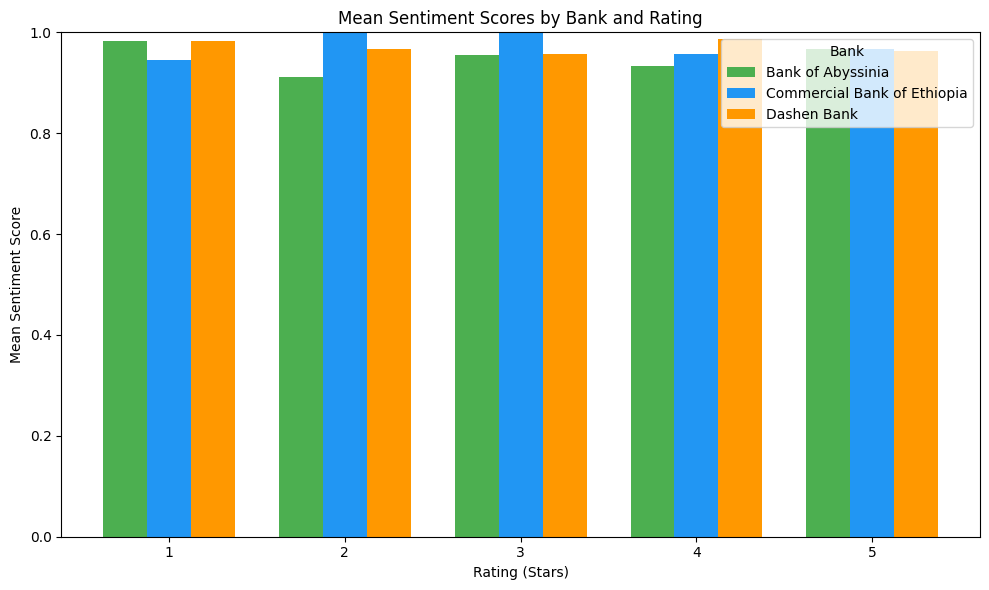

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Set file path
agg_csv_path = r"C:\Users\HP\10 Acadamy PRojects\New folder (2)\Customer-Experience-Analytics\data\sentiment_aggregation.csv"
output_chart_path = r"C:\Users\HP\10 Acadamy PRojects\New folder (2)\Customer-Experience-Analytics\data\sentiment_aggregation_chart.png"

# Load the sentiment aggregation data
print("Loading sentiment aggregation data...")
try:
    df = pd.read_csv(agg_csv_path)
    print(f"Success! Loaded {len(df)} rows.")
except FileNotFoundError:
    print(f"Oops! Couldn't find 'sentiment_aggregation.csv' at {agg_csv_path}. Please check if Step 4 completed.")
    exit()

# Prepare data for plotting
banks = df['bank'].unique()
ratings = sorted(df['rating'].unique())
bar_width = 0.25
x = np.arange(len(ratings))
colors = ['#4CAF50', '#2196F3', '#FF9800']  # Green, Blue, Orange for banks

# Create grouped bar chart
plt.figure(figsize=(10, 6))
for i, bank in enumerate(banks):
    bank_data = df[df['bank'] == bank].sort_values('rating')
    plt.bar(x + i * bar_width, bank_data['mean_sentiment_score'], bar_width, label=bank, color=colors[i])

# Customize chart
plt.xlabel('Rating (Stars)')
plt.ylabel('Mean Sentiment Score')
plt.title('Mean Sentiment Scores by Bank and Rating')
plt.xticks(x + bar_width, ratings)
plt.legend(title='Bank')
plt.ylim(0, 1)
plt.tight_layout()

# Save and show chart
plt.savefig(output_chart_path)
print(f"Chart saved to {output_chart_path}")
plt.show()

In [3]:
import pandas as pd

In [4]:
df= pd.read_csv('C:/Users/HP/10 Acadamy PRojects/New folder (2)/Customer-Experience-Analytics/data/reviews_with_themes.csv')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 341 entries, 0 to 340
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   review_text      341 non-null    object 
 1   rating           341 non-null    int64  
 2   date             341 non-null    object 
 3   bank             341 non-null    object 
 4   source           341 non-null    object 
 5   review_id        341 non-null    int64  
 6   sentiment_label  341 non-null    object 
 7   sentiment_score  341 non-null    float64
 8   tfidf_keywords   341 non-null    object 
 9   noun_phrases     341 non-null    object 
 10  tokens           341 non-null    object 
 11  word_count       341 non-null    int64  
 12  theme            341 non-null    object 
dtypes: float64(1), int64(3), object(9)
memory usage: 34.8+ KB


In [6]:
df["bank"].unique()

array(['Commercial Bank of Ethiopia', 'Bank of Abyssinia', 'Dashen Bank'],
      dtype=object)

In [ ]:
df

In [8]:
# Create a DataFrame of unique banks from the 'bank' column
df_banks = pd.DataFrame({'bank': df['bank'].unique()})

# Preview the result
print(df_banks)

                          bank
0  Commercial Bank of Ethiopia
1            Bank of Abyssinia
2                  Dashen Bank


In [9]:
import pandas as pd
import uuid

# Generate UUIDs for each bank
df_banks['id'] = [uuid.uuid4() for _ in range(len(df_banks))]

# Preview
print(df_banks.head())

                          bank                                    id
0  Commercial Bank of Ethiopia  ccc1893e-069b-4a65-811b-d322c4760b01
1            Bank of Abyssinia  2d7c52e7-9dc1-47c1-bec2-27137e68cf23
2                  Dashen Bank  e4f6ae15-12b8-41d8-8a8b-3fe189aa8a47


In [10]:
# Save df_banks to CSV
df_banks.to_csv('C:/Users/HP/10 Acadamy PRojects/New folder (2)/Customer-Experience-Analytics/data/banks.csv', index=False)
print("df_banks saved to banks_with_id.csv")

df_banks saved to banks_with_id.csv


In [11]:
import pandas as pd
import uuid

# Original unique banks from your original df
unique_banks = df['bank'].unique()
df_banks = pd.DataFrame({
    'bank_name': unique_banks,
    'id': [uuid.uuid4() for _ in range(len(unique_banks))]
})

print(df_banks)

                     bank_name                                    id
0  Commercial Bank of Ethiopia  46cac6d4-a7a7-46c9-bb80-3377b58d2e80
1            Bank of Abyssinia  bf091879-6f03-4d59-b4c0-982a8e73bfa1
2                  Dashen Bank  a41ca412-966b-4c7b-97a8-199165e40950


In [12]:
# Save df_banks to CSV
df_banks.to_csv('C:/Users/HP/10 Acadamy PRojects/New folder (2)/Customer-Experience-Analytics/data/banks.csv', index=False)
print("df_banks saved to banks_with_id.csv")

df_banks saved to banks_with_id.csv


In [13]:
# Merge UUIDs from df_banks into df to create df_reviews
df_reviews = df.merge(df_banks, how='left', left_on='bank', right_on='bank_name')

# Keep only the needed columns and rename for clarity
df_reviews = df_reviews.rename(columns={
    'id': 'bank_id'
})[['review_id', 'bank_id', 'review_text', 'sentiment_label', 'sentiment_score', 'theme']]

print(df_reviews.head())


   review_id                               bank_id  \
0          5  46cac6d4-a7a7-46c9-bb80-3377b58d2e80   
1          7  46cac6d4-a7a7-46c9-bb80-3377b58d2e80   
2          8  46cac6d4-a7a7-46c9-bb80-3377b58d2e80   
3         10  46cac6d4-a7a7-46c9-bb80-3377b58d2e80   
4         11  46cac6d4-a7a7-46c9-bb80-3377b58d2e80   

                                         review_text sentiment_label  \
0                                best app of finance        positive   
1                               engida kebede fetera        negative   
2                                   it is not safety        negative   
3  it is like a childish app make it better the w...        negative   
4  it's a problem solver application, go ahead cb...        positive   

   sentiment_score  theme  
0         0.999650  Other  
1         0.839674  Other  
2         0.999787  Other  
3         0.999796  Other  
4         0.999768  Other  


In [14]:
df_reviews.to_csv('C:/Users/HP/10 Acadamy PRojects/New folder (2)/Customer-Experience-Analytics/data/reviews.csv', index=False)

NameError: name 'df_banks' is not defined

In [16]:
df_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 341 entries, 0 to 340
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   review_id        341 non-null    int64  
 1   bank_id          341 non-null    object 
 2   review_text      341 non-null    object 
 3   sentiment_label  341 non-null    object 
 4   sentiment_score  341 non-null    float64
 5   theme            341 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 16.1+ KB


In [ ]:
!pip install pandas